<a href="https://colab.research.google.com/github/anandp11/Speech-Emotion-Recognition--1/blob/main/RAVDESS%20PreProcessed/MLP%20Model%20with%20X_train%20X_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings
warnings.filterwarnings('ignore')

import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import numpy as np
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

dataset = '/content/drive/MyDrive/SER/audio_speech_actors_01-24/'

Mounted at /content/drive


In [5]:
actor_folders = os.listdir(dataset)
actor_folders.sort()
actor_folders

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [6]:
emotions = []
gender = []
actor_ID = []
file_path = []
for i in actor_folders:
    filename = os.listdir(dataset + i) #iterate over Actor folders
    for f in filename: # go through files in the corresponding Actor's folder
        part = f.split('.')[0].split('-')#We split the file name initially as['03-01-01-01-01-01-01','wav'];Now,the 0th element is converted as ['03','01','01','01','01','01','01']
        emotions.append(int(part[2])) #Since,the second element represents the emotion of the actor.
        actor_ID.append(int(part[6])) #Since,the sixth element represents the ID of the actor.
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female" #Since,even IDs correspond to females.
        else:
            bg = "male"  #Since,odd IDs correspond to females.
        gender.append(bg)
        file_path.append(dataset + i + '/' + f)

#Creating a dataframe:
audio_df = pd.DataFrame(emotions)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor_ID)],axis=1)
audio_df.columns = ['Gender','Emotion','Actor_ID']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['Path'])],axis=1)
audio_df

,Gender,Emotion,Actor_ID,Path
0,male,calm,1,/content/drive/MyDrive/SER/audio_speech_actors...
1,male,calm,1,/content/drive/MyDrive/SER/audio_speech_actors...
2,male,calm,1,/content/drive/MyDrive/SER/audio_speech_actors...
3,male,calm,1,/content/drive/MyDrive/SER/audio_speech_actors...
4,male,neutral,1,/content/drive/MyDrive/SER/audio_speech_actors...
...,...,...,...,...
1435,female,surprise,24,/content/drive/MyDrive/SER/audio_speech_actors...
1436,female,fear,24,/content/drive/MyDrive/SER/audio_speech_actors...
1437,female,fear,24,/content/drive/MyDrive/SER/audio_speech_actors...
1438,female,disgust,24,/content/drive/MyDrive/SER/audio_speech_actors...


In [7]:
def extract_features(data, sample_rate):  # Add sample_rate as a parameter
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)  # Now sample_rate is available
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data, sample_rate)  # Pass sample_rate to extract_features
    result = np.array(res1)

    return result

In [8]:
path = np.array(audio_df.Path)[1]
data, sample_rate = librosa.load(path)

X, Y = [], []
for path, emotion in zip(audio_df.Path, audio_df.Emotion):
    feature = get_features(path)
    X.append(feature)
    Y.append(emotion)

In [9]:
X

Output hidden; open in https://colab.research.google.com to view.

In [10]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,labels
0,0.194051,0.594163,0.654327,0.726113,0.700755,0.671965,0.669553,0.663774,0.727362,0.688118,...,0.000002,0.000002,0.000002,0.000003,0.000006,0.000007,0.000007,0.000005,2.786056e-07,calm
1,0.177698,0.545940,0.612854,0.691112,0.649464,0.601933,0.562597,0.511677,0.500723,0.527096,...,0.000022,0.000012,0.000016,0.000023,0.000036,0.000050,0.000046,0.000028,1.757193e-06,calm
2,0.227756,0.627320,0.667514,0.695362,0.749232,0.734184,0.644267,0.662989,0.705062,0.704013,...,0.000006,0.000006,0.000004,0.000004,0.000006,0.000009,0.000011,0.000005,4.489416e-07,calm
3,0.277900,0.602604,0.667740,0.690958,0.711157,0.668959,0.606182,0.608332,0.640324,0.688707,...,0.000009,0.000012,0.000028,0.000034,0.000036,0.000036,0.000042,0.000024,2.138941e-06,calm
4,0.337678,0.715208,0.759374,0.755704,0.757634,0.743580,0.651788,0.629598,0.679255,0.737464,...,0.000013,0.000013,0.000015,0.000020,0.000028,0.000048,0.000032,0.000018,1.461863e-06,neutral


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

X = Features.iloc[: ,:-1].values
y = Features['labels'].values

encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1152, 161), (1152, 8), (288, 161), (288, 8))

In [13]:
def plotter(history):
  plt.figure()
  plt.plot(history.history['loss'],label='train loss')
  plt.plot(history.history['val_loss'],label='test loss')
  plt.xlabel('iterations')
  plt.ylabel('losses')
  plt.legend()
  plt.figure()
  plt.plot(history.history['accuracy'],label='train accuracy')
  plt.plot(history.history['val_accuracy'],label='test accuracy')
  plt.xlabel('iterations')
  plt.ylabel('accuracy')
  plt.legend()

Epoch 1/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.1716 - loss: 2.0145 - val_accuracy: 0.1667 - val_loss: 1.9603
Epoch 2/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2646 - loss: 1.8800 - val_accuracy: 0.2396 - val_loss: 1.8886
Epoch 3/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3287 - loss: 1.7615 - val_accuracy: 0.3576 - val_loss: 1.7713
Epoch 4/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4218 - loss: 1.5931 - val_accuracy: 0.4340 - val_loss: 1.5743
Epoch 5/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4994 - loss: 1.4026 - val_accuracy: 0.4479 - val_loss: 1.4995
Epoch 6/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5797 - loss: 1.1752 - val_accuracy: 0.4653 - val_loss: 1.4166
Epoch 7/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6296 - loss: 1.0482 - val_accuracy: 0.4549 - val_loss: 1.3993
Epoch 8/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6633 - loss: 0.9761 - val_accuracy: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          20,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,210 (371.92 KB)

 Trainable params: 31,736 (123.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,474 (247.95 KB)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6020 - loss: 4.3260 
Test Accuracy: 61.11%


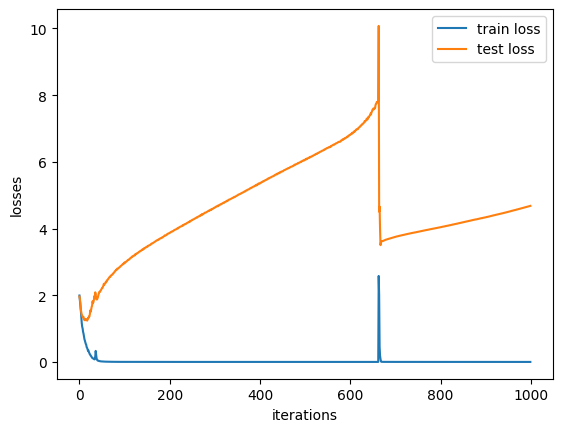

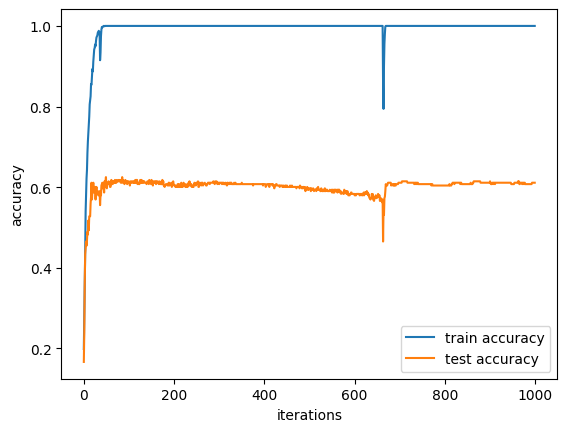

In [ ]:
from matplotlib import pyplot as plt
#building MLP model
from keras import models
from keras import layers
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,batch_size=32,epochs = 1000,verbose=1,validation_data=(X_test,y_test))

plotter(history)

model.summary()
result = model.evaluate(X_test,y_test)
test_accuracy_percentage = result[1] * 100

# Print the result
print("Test Accuracy: {:.2f}%".format(test_accuracy_percentage))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


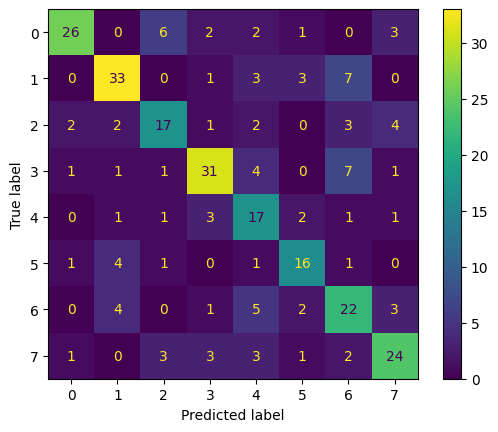

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [2]:
# prompt: I want to pickle the model and save to the same path in drive as  MLP Model with X_train_test.pkl

import pickle

# Save the model to a file
filename = '/content/drive/MyDrive/SER/MLP Model with X_train_test.pkl'
pickle.dump(model, open(filename, 'wb'))
print(f"Model and label encoder saved to {filename}")

NameError: name 'model' is not defined